In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

colnames = ["time/s\t", "current/A\t", "potential/V"]

path = r'C:\Users\Sebastian\Documents\RWTH\IDS\Aufgaben\py_challenges\01_challenge\01-data\80CO2_20CO' # use your path
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    naming = filename.split()
    naming = naming[1]
    df = pd.read_csv(filename, index_col=None,sep='\s+', names = colnames, skiprows = 1, dtype = np.float64 )
    df["temperature"] = naming
    li.append(df)

df8020 = pd.concat(li, axis=0, ignore_index=True)

path = r'C:\Users\Sebastian\Documents\RWTH\IDS\Aufgaben\py_challenges\01_challenge\01-data\50CO2_50CO' # use your path
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    naming = filename.split()
    naming = naming[1]
    df = pd.read_csv(filename, index_col=None,sep='\s+', names = colnames, skiprows = 1) 
    df["temperature"] = naming
    li.append(df)

df5050 = pd.concat(li, axis=0, ignore_index=True)



print(df5050.head())
print(df8020.head())

   time/s\t  current/A\t  potential/V temperature
0       1.0    -0.000019     0.995485       700°C
1       2.0    -0.000019     0.995485       700°C
2       3.0    -0.000003     0.995485       700°C
3       4.0    -0.000019     0.995485       700°C
4       5.0    -0.000019     0.995485       700°C
   time/s\t  current/A\t  potential/V temperature
0       1.0    -0.000019     0.939422       698°C
1       2.0    -0.000019     0.939422       698°C
2       3.0    -0.000019     0.939422       698°C
3       4.0    -0.000019     0.939612       698°C
4       5.0    -0.000019     0.939612       698°C


In [3]:
df5050["current_density"] = df5050["current/A\t"] / 0.785
df8020["current_density"] = df8020["current/A\t"] / 0.785

print(df5050.head())

   time/s\t  current/A\t  potential/V temperature  current_density
0       1.0    -0.000019     0.995485       700°C        -0.000024
1       2.0    -0.000019     0.995485       700°C        -0.000024
2       3.0    -0.000003     0.995485       700°C        -0.000004
3       4.0    -0.000019     0.995485       700°C        -0.000024
4       5.0    -0.000019     0.995485       700°C        -0.000024


In [4]:
combined_df = df5050.append(df8020)

In [5]:
plt.figure(figsize=(30, 30))

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

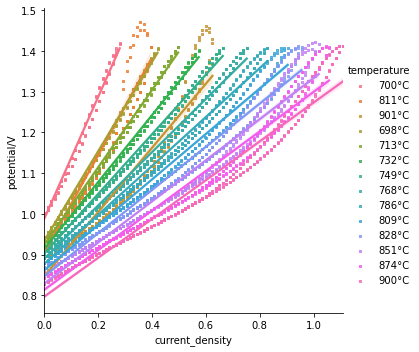

In [6]:
sns.lmplot("current_density", "potential/V", data = combined_df, hue = "temperature", markers=",", scatter_kws={"s": 5})

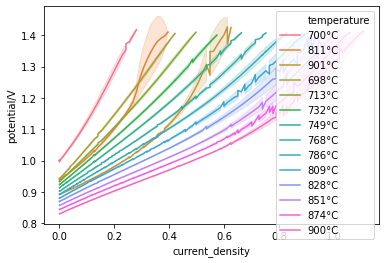

In [7]:
sns.lineplot("current_density", "potential/V", data = combined_df, hue = "temperature")

In [8]:
print(combined_df[combined_df["current_density"] == 0])

Empty DataFrame
Columns: [time/s	, current/A	, potential/V, temperature, current_density]
Index: []
